In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=[0],date_parser=dateparse,index_col='Month')

C:\Users\ebabbpa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


    parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
    index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
    date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

In [5]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
data.shape

(144, 1)

In [8]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [9]:
data.index.max()-data.index.min()

Timedelta('4352 days 00:00:00')

In [10]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
# IF you want to see number of passangers between Jan to May for year 1949
data[:'1949-05-01']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
#If you want to see passangers for year 1949
data['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [13]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
ts['1949-01-01']

112

#### How to check whether the Time Series is Stationary or Not??
Time Series is said to be Stationary if its statistical properties such as "Mean" and "Varience" remains constant over the period of time.

Time Series models work on the assumption that "Time Series is stationary"
Its easier to implement the Stationary time series  rather than the "Non-Stationary ones".


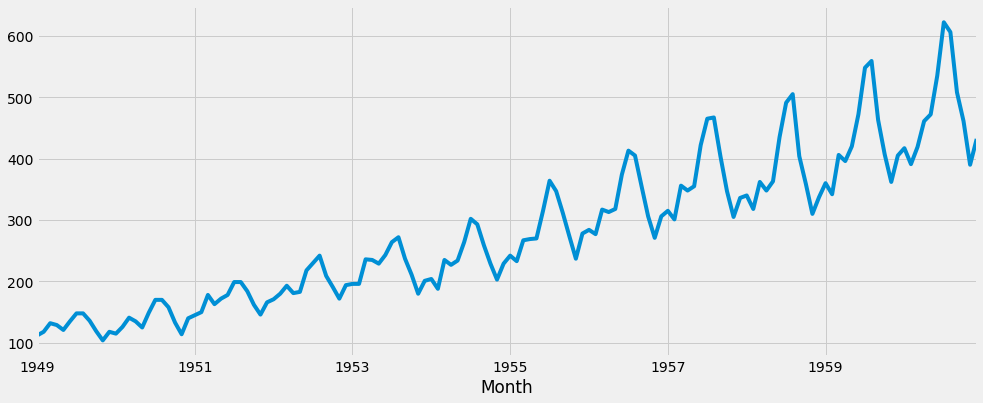

In [15]:
ts.plot(figsize = (15,6))

In [16]:
moving_avg_passengers = ts.rolling(window=12).mean()
moving_avg_passengers_std = ts.rolling(window=12).std()

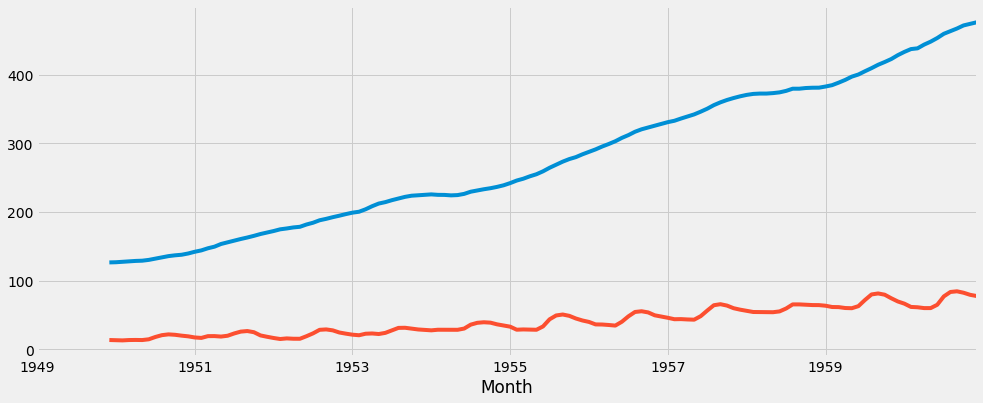

In [17]:
moving_avg_passengers.plot(figsize =(15,6) )
moving_avg_passengers_std.plot(figsize =(15,6))

### How to find the stationarity in the given dataset

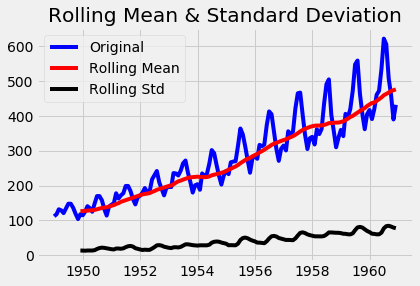

In [18]:

plt.plot(ts,color='blue',label='Original')
plt.plot(moving_avg_passengers,color='red', label='Rolling Mean')
plt.plot(moving_avg_passengers_std,color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
from scipy import stats
import statsmodels.api as sm

In [20]:
sm.stats.durbin_watson(ts)

0.0121527966037621

Even though durbin Watson co-effiecient is low from the pic we can see that data is not stationary.

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. 

#### With the help of Dicky-fuller test we also check whether the data is stationary or not.

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
#Ho: Time series is not stationary>> Null Hypothesis
#H1: Time series is stationary>> Alternate Hypothesis
def test_adfuller(timeseries):
    result = adfuller(timeseries)
    dfoutput = pd.Series(result[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    if dfoutput['p-value']<= 0.05:
        print("Reject the null hypothesis, Time series is stationary")
    else:
        print("Accept the null hyptothesis, Time series is non stationary")



In [23]:
test_adfuller(ts)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Accept the null hyptothesis, Time series is non stationary


From the above stats we see that Test statastic score is more than(1%,5%,10%) of critical value so data is not stationary and also P value is greater than 0.05, From these two points we consider that Data is not stationary.

### How to make a Time Series Stationary?
Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

#### There are 2 major reasons behind non-stationaruty of a TS: Trend and Seasonality

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.


#### Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity.

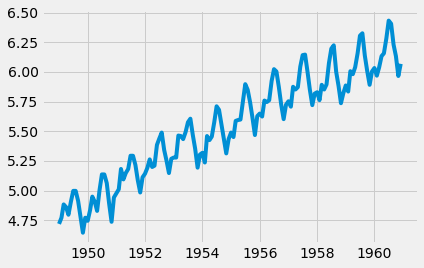

In [24]:
ts_log = np.log(ts)
plt.plot(ts_log)

After applying the transformation we can see that scale of the data reduced. ie priviously scale was from 100 to 600 now reduced into 4 to 6.5. Still the data is showing increasing trend we need to smoother the data to make it stationary. We will apply "Moving Averages".


#### Moving Average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

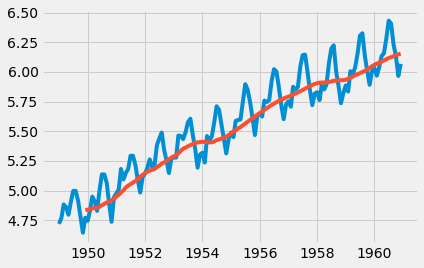

In [26]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg)

Here note that we smoothered the effect of Seasonality, lets do the differencing for further "Smoother" operation.

In [28]:
ts_log_moving_avg_diff = ts_log-moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

Observe that first 11 values are "NaN" since we took the rolling average for 12 months, so first 11 data values will be "Nan". Lets drop these Nan values and lets check for "Stationarity" by using the earlier methods.

In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [30]:
test_adfuller(ts_log_moving_avg_diff)

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Reject the null hypothesis, Time series is stationary


The test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

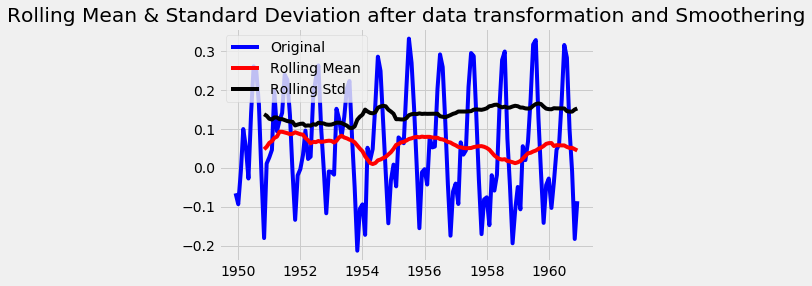

In [32]:
plt.plot(ts_log_moving_avg_diff,color='blue',label='Original')
plt.plot(ts_log_moving_avg_diff.rolling(12).mean(),color='red', label='Rolling Mean')
plt.plot(ts_log_moving_avg_diff.rolling(12).std(),color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after data transformation and Smoothering')
plt.show(block=False)

#### Eliminating the Trend and Seasonality.
1. Differenting and 2.Decomposition.


In [33]:
ts_log_diff = ts_log-ts_log.shift()
ts_log_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 144, dtype: float64

In [34]:
ts_log_diff.dropna(inplace=True)

In [35]:
test_adfuller(ts_log_diff)

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Accept the null hyptothesis, Time series is non stationary


We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence.

#### Forecasting the Time Series using ARIMA

AR: Auto regression term (p): This value can be found out from PACF
I: Integrated(d):This is found by differencing he we used difference of 1 so d=1
MA: Moving Averages(q): This value can be found out from ACF.

ACF : Auto Corelation Function: It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

PACF : Partial Auto Corelation Function : This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

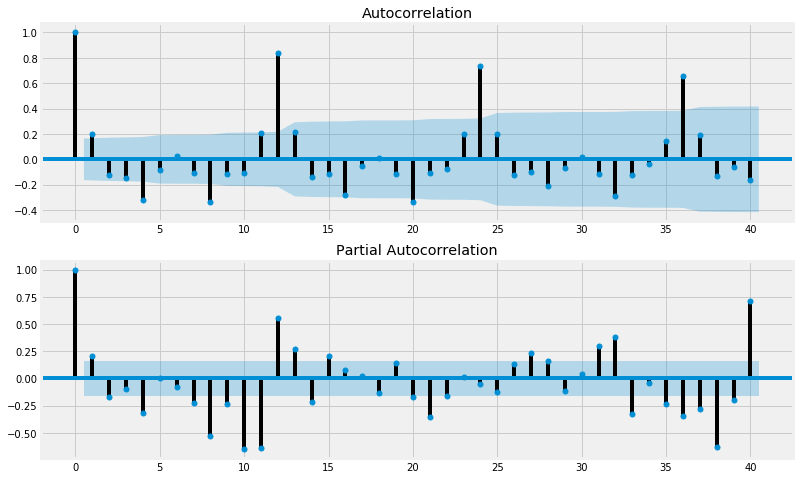

In [36]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=40, ax=ax2)

From the above graph we can found out that the values of P and Q are 2.

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
model = ARIMA(ts_log,order=(2,1,2))

C:\Users\ebabbpa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ebabbpa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

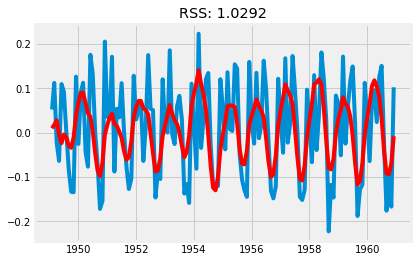

In [67]:
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [68]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


Notice that these start from ‘1949-02-01’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [69]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [70]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1046')

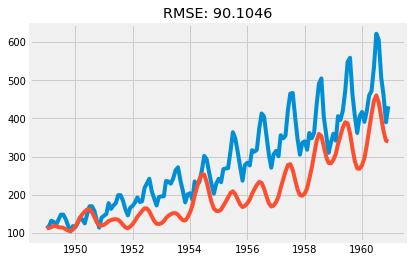

In [71]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))